# Assignment 4 - Neural Networks :

# Introduction-

The aim of this assignment is to make use of Neural Networks for regression.A 5-fold cross validation has been used to find good parameters and report cross validation accuracies.Non-linear regression and Non-linear logistic regression have been demonstrated in this assignment.Non-linear Logistic Regression has been applied on toy data and on classification data.

# Data :

Introduction :

The following dataset is a set of articles published by Mashable(a digital media website).It gives us an insight on the attributes of the articles like the day they were published,their url,shares etc.It helps us to determine the popularity of the article and find out a co-relation between them.The attributes under consideration are as follows-
     0 url:                           URL of the article
     1. timedelta:                     Days between the article publication and
                                       the dataset acquisition
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the
                                       content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles
                                       published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the
                                       content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in
                                       Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in
                                       Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in
                                       Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral
                                       tokens
    49. rate_negative_words:           Rate of negative words among non-neutral
                                       tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)

In [318]:
#Reading the data-

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nn
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline
def load_csv(path='onlinenews.csv'):
    csv_path='onlinenews.csv'
    return pd.read_csv(csv_path)
onlinenews=load_csv()

# Visualization & Preprocessing of the Data :

In [268]:
onlinenews.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [270]:
onlinenews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null int64
n_tokens_title                   39644 non-null int64
n_tokens_content                 39644 non-null int64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null int64
num_self_hrefs                   39644 non-null int64
num_imgs                         39644 non-null int64
num_videos                       39644 non-null int64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null int64
data_channel_is_lifestyle        39644 non-null int64
data_channel_is_entertainment    39644 non-null int64
data_channel_is_bus              39644 non-null int64
data_channel_is_so

In [271]:
onlinenews.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_shares', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
      

In [272]:
onlinenews.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [320]:
onlinenews.isnull().any().sum()

0

In [321]:
#General overview of data-
#The data does not have missing values.

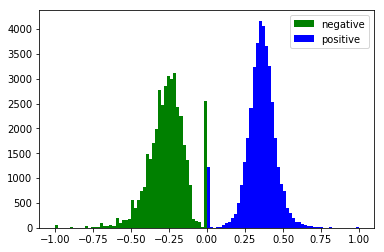

In [322]:
import matplotlib.pyplot as plt
plt.hist(onlinenews.avg_negative_polarity,color='g',bins=50,label='negative')
plt.hist(onlinenews.avg_positive_polarity,color='b',bins=50,label='positive')
plt.legend()
plt.show()

The above histogram shows that the average negative polarity has a higher variability.

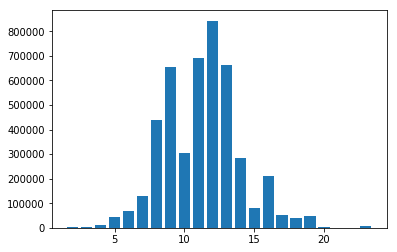

In [323]:
plt.bar(onlinenews.n_tokens_title,onlinenews.shares)
plt.show()

The above bar graph suggests that the ideal number of words in the title is around 12,after and before which the customers seem to be uninterested in sharing the article.

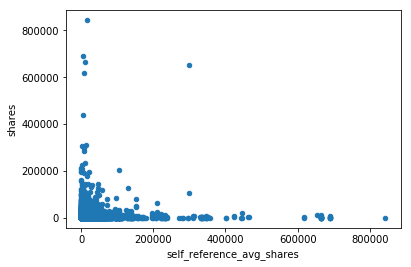

In [324]:
onlinenews.plot(kind='scatter',x="self_reference_avg_shares",y="shares")
plt.show()

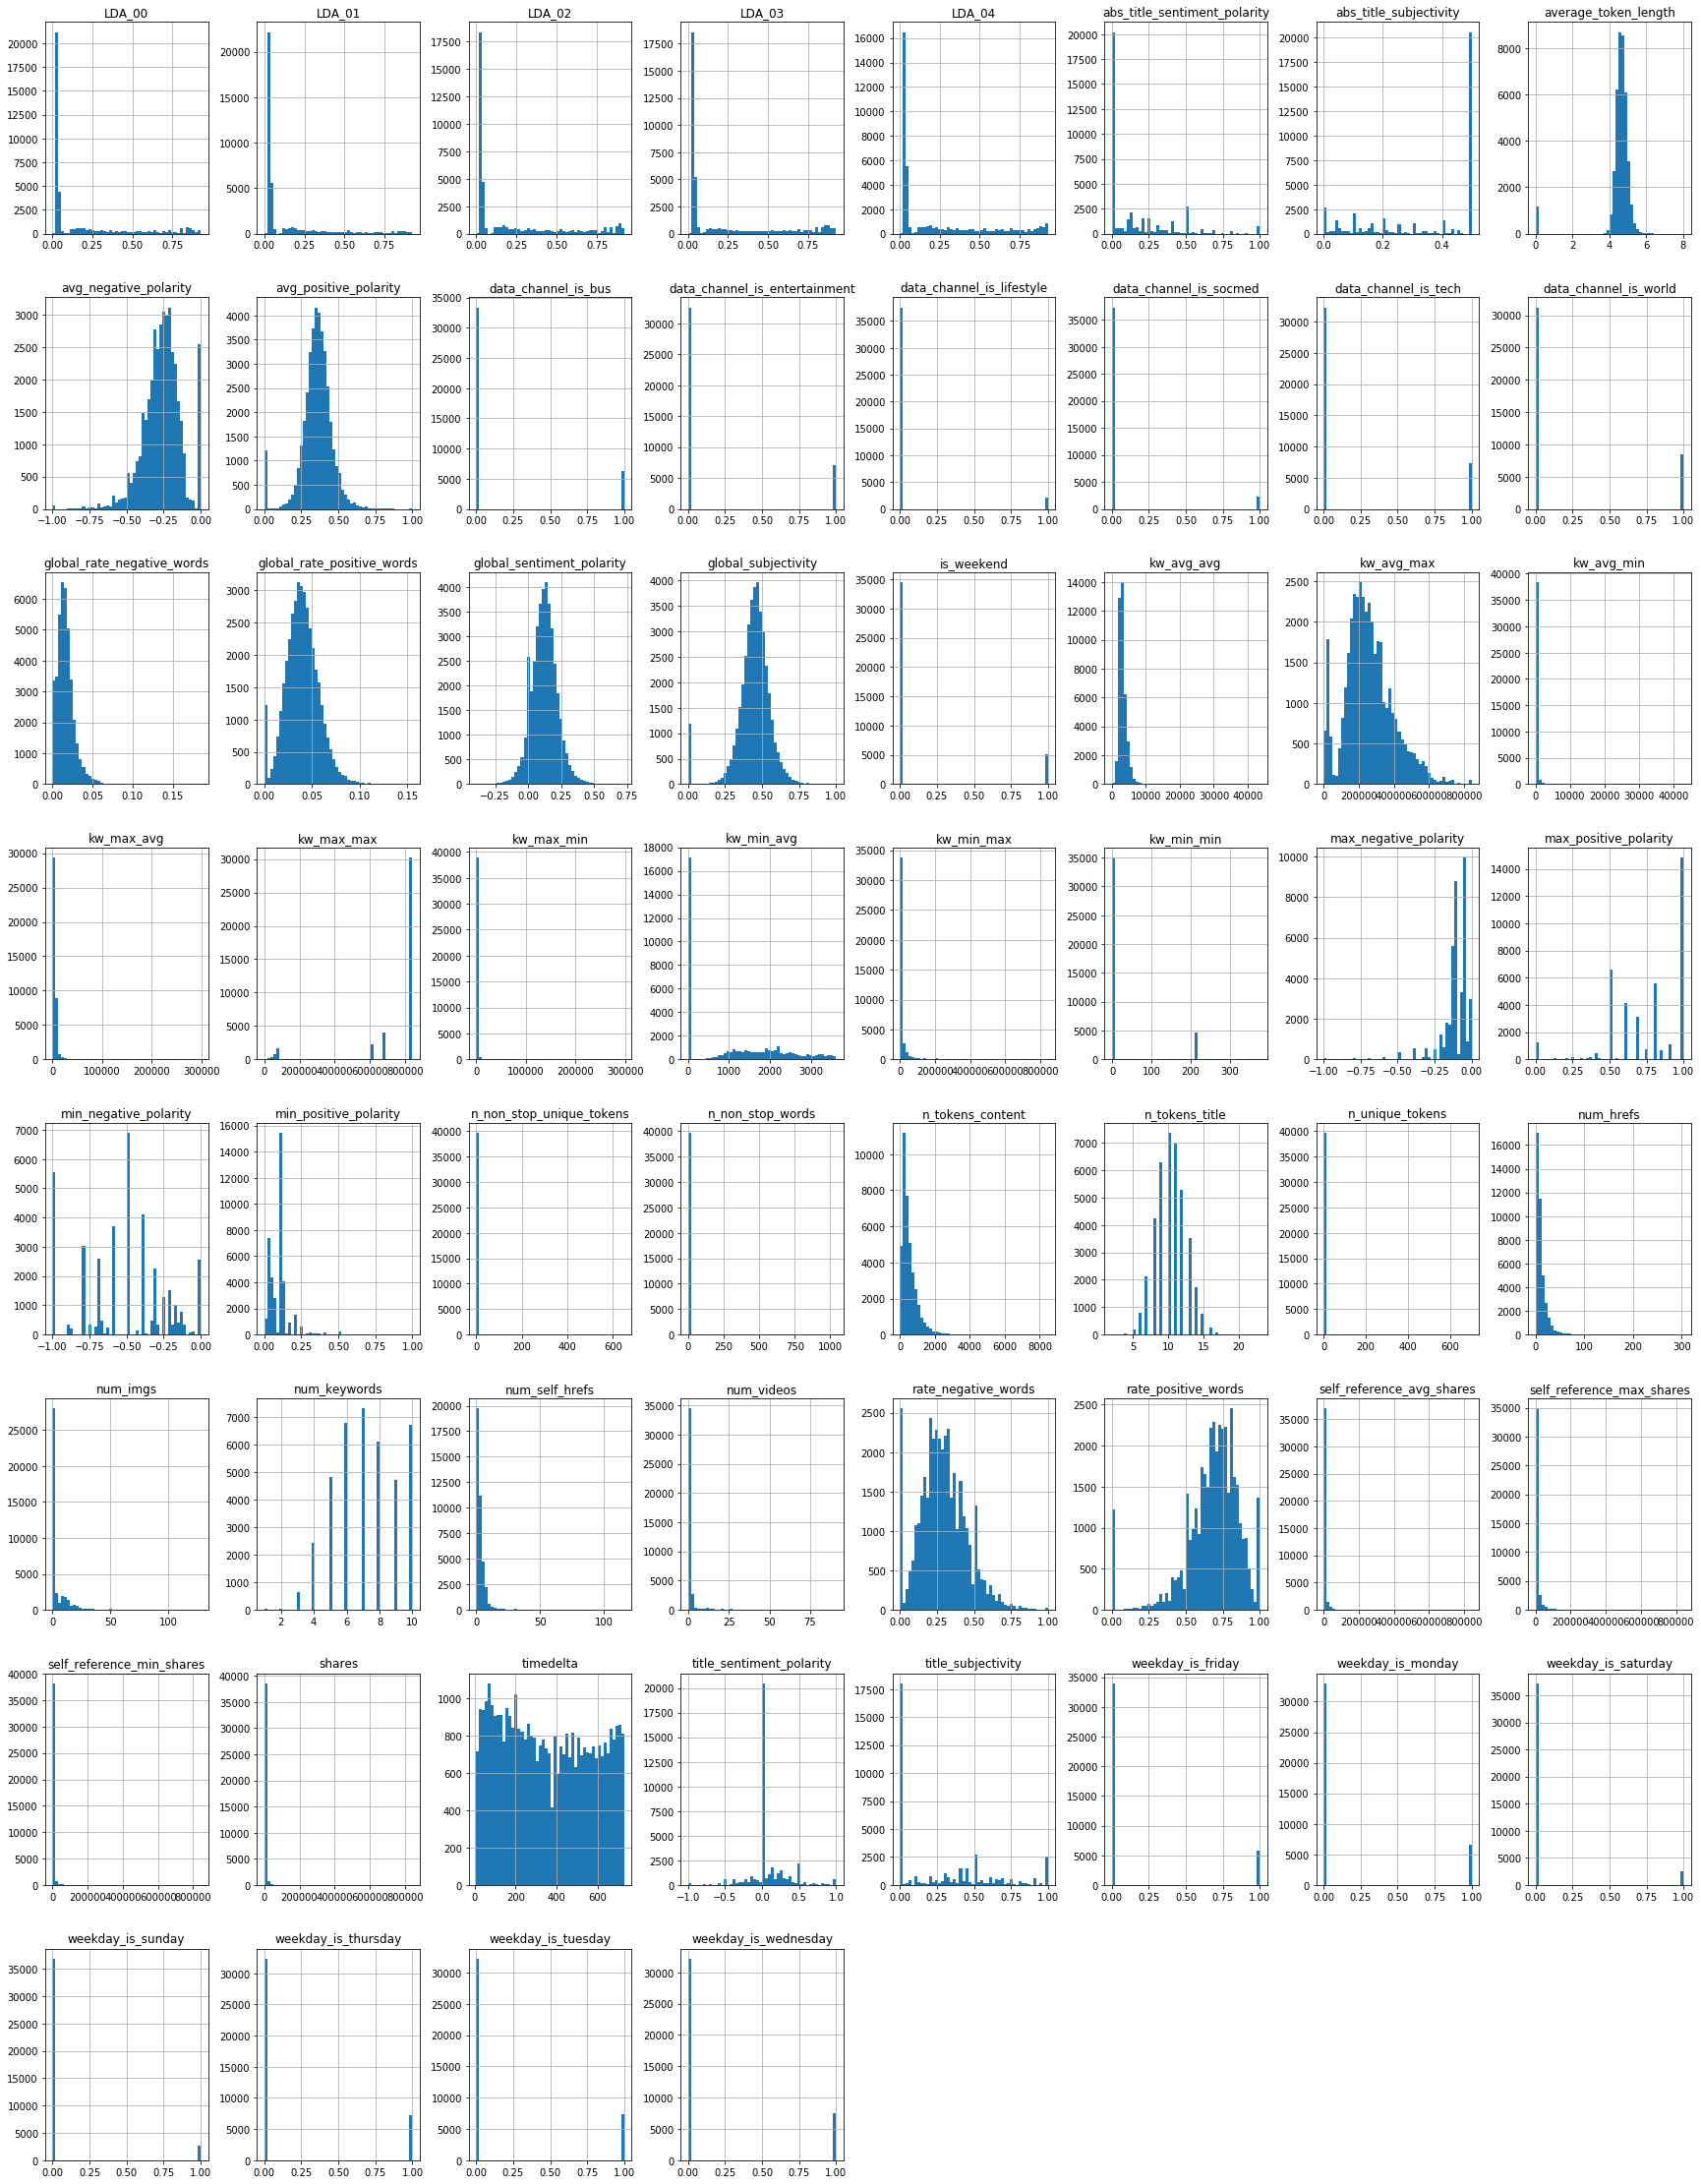

In [325]:
import matplotlib.pyplot as plt
onlinenews.hist(bins=50,figsize=(30,40))
plt.show()

In [273]:
onlinenews=onlinenews.drop('url',axis=1)
onlinenews_target=pd.DataFrame(onlinenews.iloc[:,-1])
onlinenews=onlinenews.drop('shares',axis=1)

In [32]:
onlinenews.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936


In [33]:
onlinenews.corr()['shares'].sort_values(ascending=False)

shares                           1.000000
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
self_reference_avg_shares        0.057789
self_reference_min_shares        0.055958
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
title_subjectivity               0.021967
num_keywords                     0.021818
is_weekend                       0.016958
weekday_is_saturday              0.015082
title_sentiment_polarity         0.012772
avg_positive_polarity            0.012142
max_positive_polarity            0.010068
weekday_is_monday                0

In [274]:
onlinenews=onlinenews[[
'kw_avg_avg',                       
'LDA_03',                           
'kw_max_avg',                       
'self_reference_avg_shares',        
'self_reference_min_shares',        
'self_reference_max_shares',        
'num_hrefs',                        
'kw_avg_max',                       
'kw_min_avg',                       
'num_imgs',                         
'global_subjectivity',              
'kw_avg_min',                       
'kw_max_min',                       
'abs_title_sentiment_polarity',     
'num_videos',                       
'title_subjectivity',               
'num_keywords',                     
'is_weekend',                       
'weekday_is_saturday',              
'title_sentiment_polarity']]

In [275]:
onlinenews.shape

(39644, 20)

In [276]:
onlinenews_target.shape

(39644, 1)

# Neural Networks,Non-Linear Regression,Activation Function-

### Neural Networks-
Neural Networks are inspired by the neurons in our brain.Similar to the synaptic connections between the neurons,we stack the hidden units in order to map data into non-linear space for rich representation.The neural networks consist of input layers,hidden layers and an output layer.The hidden layer is used to perform computations on the  input from the input layer and transfer the output to the output layer.This process is called forward propagation.These values are compared with actual values and the weights are updated based on the errors.This is known as backward propagation.

### Non-Linear Regression-
Non-linear regression is a form of regression analysis in which observational data are modeled by a function which is a non-linear combination of the model parameters and depends on one or more independent variables.The main objective of the model is to make the sum of the squares as small as possible. The sum of squares is used to check how our observations are varying from the mean of the data set. The smaller the sum of these squared figures, the better the function fits the data points in the set.

### Activation Function-
The activation function does the nonlinear transformation to the input making it capable to learn and we send this to the next layer of neurons. There are several different types of activation function like tanh, ReLu, Leaky ReLu, Sigmoid, step function, etc.

# Neural Network-

In [277]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

In [278]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

# Explanation of Code-
There are two classes used above, Standardizer and NeuralNet.The Standardizer normalizes the values.NeuralNet is used to create the neural network which processes the data through feed forward and back propagation.nunits is used to give the number of inputs,hidden layers and outputs.The set_hunit function is used to either update or initiate the weights. It takes the weight as the parameter.The Pack function packs the multiple weights of each layer into one vector.The unpack function upacks the weights from the vector.Forward pass in neural network propagates as shown below:
$$
\begin{align}
Z &= h(X1 \cdot V) \\
\\
Y & = Z1 \cdot W 
\end{align}
$$
The activation function is used to make the network non-linear.In the backward pass the function takes the the z values, Target values and the error as input. Based on the delta value, the weights and the bias are updated accoringly. This method returns the weight vector packed together of that particualr layer.The backward pass is shown as-
$$
\begin{align}
V &\leftarrow V + \alpha_h \frac{1}{N} \frac{1}{K} X1^\top \Big( (T - Y) W^\top \odot (1 - Z^2) \Big) \\
W &\leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Z1^\top \Big( T - Y \Big) 
\end{align}
$$

The train function uses the features and the target as input. The gradientf function unpacks the weights and calls the forward function initiating the forward pass.Error is calculated using the results of forward pass.Back propagation is followed by calling backward function with parameters like error,Z,T(Target),lambda.The use function is applied to the model after training the model.Testing data is passed as parameter and it stadardizes the data.Then forward propagation is used to return the predictions.
<br>
_nLayers is the number of hidden unit layers.


rho is the learning rate attribute of the class.


_W is the weights.


_weights is the weights that is _W written in one dimension.


stdX is the standardization class for the data.


stdT is the standardization class for the target.

# Cross Validation-

Cross-validation is a statistical method used to estimate the skill of machine learning models.It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.The k-fold cross validation is a procedure used to estimate the skill of the model on new data.It divides the training data into (k)parts of equal size. For each k=1,2,3..k the model fits the other k-1 parts with parameter lambda such that the value of lambda makes CV(lambda) smallest.We have made use of 5-fold cross validation.

In [279]:
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

# Explanation of Code-

The split function divides the data into different partitions.Here we split the data into parts of 20% of the complete data.So we have five parts.We iterate through the length of the data and keep on appending to a list. The cross_validate function takes X ,which is the sample,T which contains the target values of the sample and models as its input parameters.It returns final_list and best_param_list.The split() function divides the data into 5 partitions.They are stored in X_partitioned and T_partitioned.The loop iterates through these parts.The remaining data is used as training set.X_test and Y_test are declared using X_partitioned and Y_partitioned.Excluding k and i,the rest of the data is our training set.In each validation loop we are traingn data with our different parameters and evaluating based on the validation data.Each parameter returns an rmse value and this is appended to the list.We are selecting the parameters which generate the least rmse value.We are storing these in history_rmse and params_list.The best ones are selected.Using the best value the model is retrained.The accuracy is appended to the final lists.It runs for 5-folds and the cross_validate function returns the best accuracies of each run.From this we choose the parameters which are repeated the most. 

# Results-

In [280]:
models = [[20,3,1],[20,5,1],[20,7,1], [20,10,1], [20,12,1]]
bestAccuracy,bestParam = cross_validate(np.array(onlinenews), np.array(onlinenews_target), models)

Test number:  0
K is :  0
K is :  1
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[16559.417642215143, 16420.01812698303, 20300.05195191026, 18175.583392086886, 16386.1114466566]
16386.1114466566
[20, 12, 1]
K is :  2
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[25748.791165951723, 24700.945830511042, 21763.3387277605, 30261.721377742702, 27690.923293350384]
21763.3387277605
[20, 7, 1]
K is :  3
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[19604.213188794638, 17085.824851792175, 26648.530473498977, 21778.79419614926, 12676.862368542099]
12676.862368542099
[20, 12, 1]
K is :  4
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[23213.326327494662, 21830.707230947097, 20596.221636980667, 19856.410808345227, 20926.37188462217]
19856.410808345227
[20, 10, 1]
[[20, 12, 1], [20, 7, 1], [20, 12, 1], [20, 10, 1]]
[16386.1114466566, 21763.3387277605, 12676.862368542099, 19856.410808345227]
[20, 7, 1]
Test number:  1
K is :  0
[

In [287]:
from sklearn import model_selection
print(bestAccuracy,bestParam)

[13863.532861027961, 20561.060770863798, 20286.705316302287, 20641.25354176906, 23385.849849939976] [[20, 7, 1], [20, 3, 1], [20, 3, 1], [20, 3, 1], [20, 3, 1]]


In [288]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(onlinenews),np.array(onlinenews_target),test_size=0.30,random_state=40)
model=NeuralNet([20,3,1])  
model.train(X_train,y_train,niter=1000)

{'w': array([ 0.41968098, -0.48049598, -0.04834841, -0.34658836,  0.6850208 ,
         0.55980366,  0.26392372, -0.07322717, -0.29889905,  0.54696914,
        -0.88108516, -1.1979426 ,  0.48030788,  1.53855734,  0.68017867,
        -0.23083546, -0.75431449, -0.50037519,  0.17475163, -0.01583726,
        -0.04014478,  0.18861666,  0.05176494, -0.15893896,  0.39937125,
        -0.01517182, -0.3512724 ,  0.0283368 , -0.12317013, -0.0605189 ,
        -0.0316554 ,  0.03753783,  0.0514892 , -0.05701775, -0.01525646,
         0.01202829, -0.37986584, -0.53707593, -0.30080986,  0.97623758,
         1.43633026,  0.7192008 ,  0.48384801, -0.01968645, -0.45023846,
         0.99960521, -0.15399446, -1.17176743, -0.33737771, -0.08445845,
         0.2276652 ,  0.09494089,  0.07165078, -0.03489611, -0.18473473,
        -0.06004693,  0.0881278 ,  0.09317752, -0.04075223, -0.10525026,
        -0.24801304,  0.04013881,  0.2314825 ,  0.41716858, -0.54695216,
         0.61170606, -0.62932557]),
 'f': 0.48

In [289]:
y_pred=model.use(X_test)

In [290]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 13413.250584531637
R squared value: 0.019437138761584594


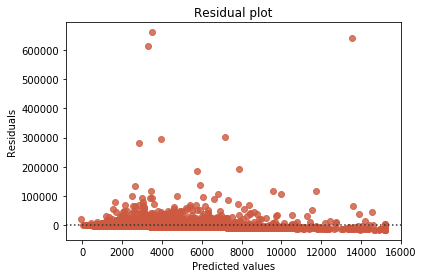

In [291]:
# Residual plot for LinearRegress model
sns.residplot(y_pred.flatten(), y_test.flatten(), color=(0.8, 0.35, 0.25))
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

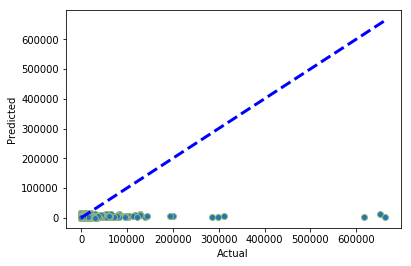

In [292]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0.6,0.7,0.5))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'b--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
plt.show()

Text(0.5,1,'NN model predictions')

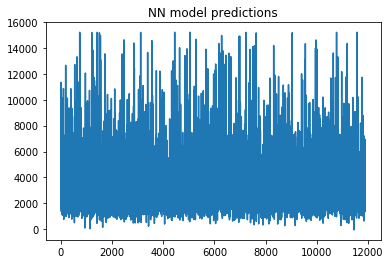

In [293]:
plt.plot(y_pred)
plt.title("NN model predictions")

# Observation and analysis of the results-

We have considered a 3 layered neural network with 20 input layer nodes as we have considered 20 features from the dataset.The output layer has 1 node.The 5-fold cross validation was performed using the values [20,3,1],[20,5,1],[20,7,1], [20,10,1], [20,12,1]. The first value represents the number of input nodes,the second value represents hidden layer nodes and the third value represents the output nodes.From the output we can see that the hidden layer node 3 values have occurred the most.The rmse value returned for it is 13413.250584531637.As it is the best fit for our data we have used 3 hidden layers.

# Discussion about the prediction results-

We have performed regression analysis using a Neural network on a non-linear regressuin problem.On training the model with [20,3,1] structure we got an RMSE value of:13413.250584531637  and R squred value of:0.019437138761584594

We are free to choose hidden layers, hidden nodes that suit our problem. Each node is connected to an activation function which makes the network more powerful. We used tanh as our activation function. The gradient updates the weights in each layer during back propagation which makes network compute the data.

# Non-Linear Logistic Regression-

# Data -

# Introduction to the data-

The dataset is a collection of data from a bank in Taiwan. It is aimed at the case of default payments of the customers.It takes into consideration the attributes which include education,age,gender,etc.The attributes help us to determine whether the person will default his/her payment.

Attribute Information :

    LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family     (supplementary) credit.
    SEX: Gender (1 = male; 2 = female).
    Education: (1 = graduate school; 2 = university; 3 = high school; 4 = others).
    MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
    Age: (year).
    PAY_0 - Pay_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    PAY_0 = the repayment status in September, 2005;
    PAY_02 = the repayment status in August, 2005; . . .;
    PAY_06 = the repayment status in April, 2005. 
    The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
    BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar).
    BILL_AMT1 = amount of bill statement in September, 2005;
    BILL_AMT2 = amount of bill statement in August, 2005; . . .; 
    BILL_AMT6 = amount of bill statement in April, 2005.
    PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). 
    PAY_AMT1 = amount paid in September, 2005; 
    PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005

In [286]:
#Reading the data-

In [326]:
def load_data(path='credit.xls'):
    xls_path="credit.xls"
    return pd.read_excel(xls_path)
bank=load_data()

# Visualization & Preprocessing of the Data :

In [327]:
bank.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [328]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [329]:
bank["AGE"].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

In [330]:
bank.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [331]:
bank.isnull().any().sum()

0

In [332]:
#The data does not have missing values.

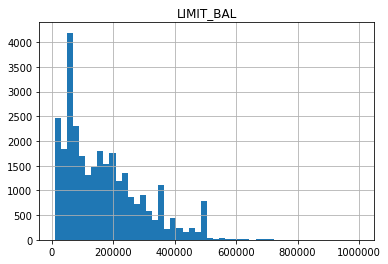

In [333]:
import matplotlib.pyplot as plt
bank.hist("LIMIT_BAL",bins=50)
plt.show()

The limit balance seems to have high frequency around 1500000.

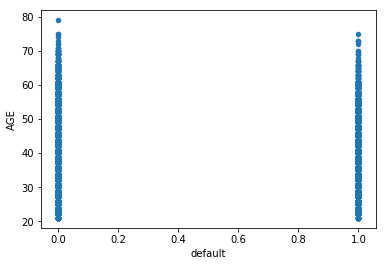

In [334]:
bank.plot(kind="scatter",x="default",y="AGE")

The above scatter plot gives us a relation between default and age of the candidates.

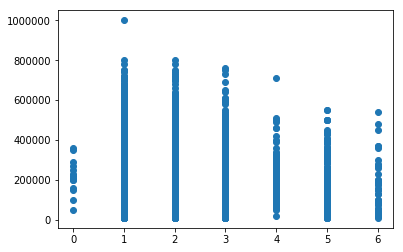

In [335]:
plt.plot(bank.EDUCATION,bank.LIMIT_BAL,'o')
plt.show()

The range of the data is expanded from 1-3 to 1-6 due to the data, from observation we come to understand that the graduate school education has highest limit balance.

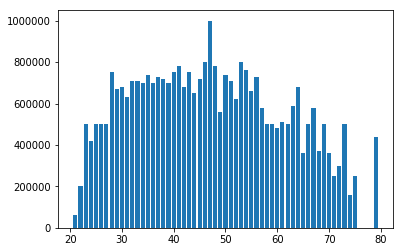

In [336]:
plt.bar(bank.AGE,bank.LIMIT_BAL)
plt.show()

The bar graph shows us that the highest balance is around 48.

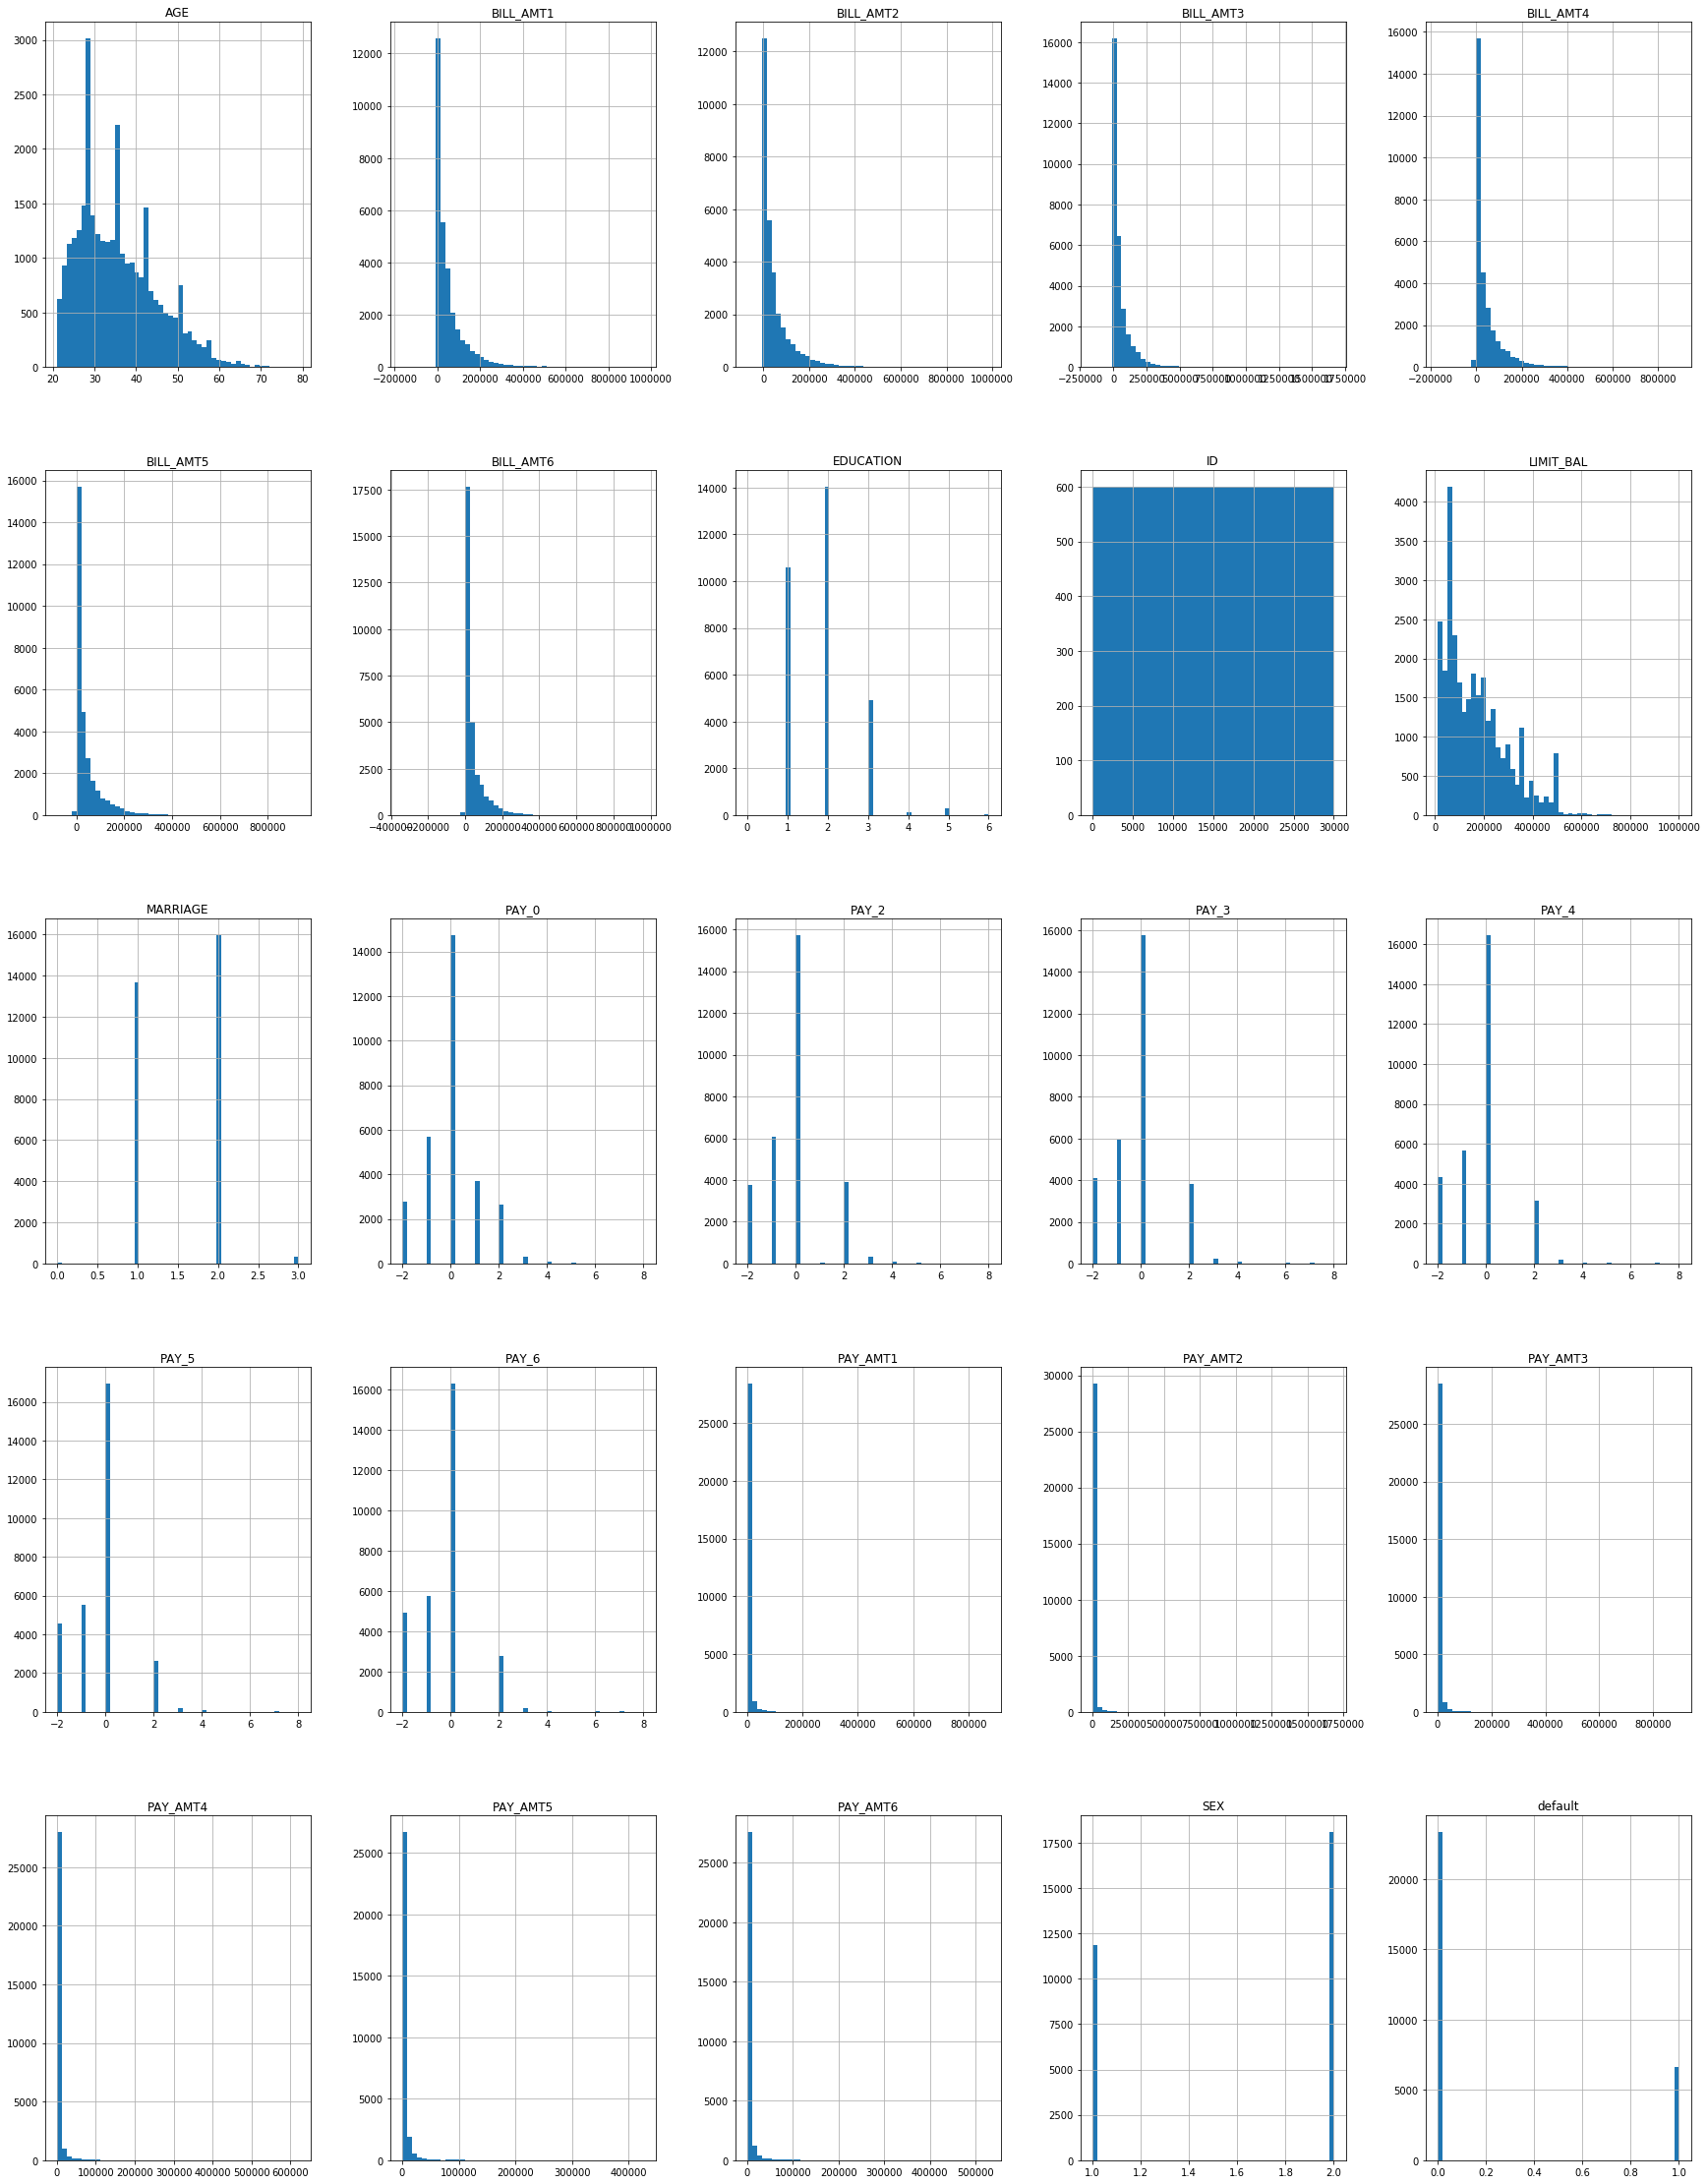

In [337]:
import matplotlib.pyplot as plt
bank.hist(bins=50,figsize=(30,40))
plt.show()

In [196]:
bank1=pd.DataFrame(bank.iloc[:,-1])

In [197]:
bank1.shape

(30000, 1)

In [198]:
bank=bank.drop('default',axis=1)

# Non-Linear Logistic Regression-

The linear logistic regression uses the softmax layer for classification along with a linear model. In nonlinear logistic regression extra layers are added which are known as hidden layers. With the inclusion of hidden layers the softmax function is used in the last layer. Till then the input layer passes its output to hidden layer, then the hidden layer to another hidden layer or softmax function and the softmax function then gives the output.
$$
w_j \leftarrow w_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$

To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
w \leftarrow w + \alpha X^\top \Big(  T - g(X)\Big).
$$

<table>
<tr>
<th></th>
<th width=45%> Regression </th>
<th width=45%> Classification </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W \\
G & = softmax(Y)
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
V &\leftarrow V + \alpha_h \frac{1}{N} \frac{1}{K} Xl^\top \Big( (T - Y) W^\top \odot (1 - Z^2) \Big) \\
W &\leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Zl^\top \Big( T - Y \Big) 
\end{align}
$$
</td>
<td>
$$
\begin{align}
V &\leftarrow V + \alpha_h Xl^\top \Big( (T - G) W^\top \odot (1 - Z^2) \Big)\\
W &\leftarrow W + \alpha_o Zl^\top \Big(  T - G\Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>
Note: Here $T$ is a matrix with indicator variable outputs, <br/>
and $G$ is the output matrix after the softmax layer.</td>
</tr>
</table> 

In [199]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        expz = np.exp(z) 
        return expz / (np.sum(expz, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(expz))

    
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)
                

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(T*(np.log(Y)))+wpenalty)

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')
                
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(X)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(X)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)
            
        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Y, Z = self.forward(X)
        l=np.argmax(Y,1)
        return Y,l

# Explanation of Code-

There is a NeuralNetLogReg class which has following functions:
init function is a constructor of the class which calls the NeuralNet class constructor for assigning values to nLayers i.e the number of layers for the model._nLayers is the number of hidden unit layers.rho is the learning rate attribute of the class._W is the weights._weights is the weights that is _W written in one dimension.stdX is the standardization class for the data.stdT is the standardization class for the target.The train function takes the feautures and the target as the input. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. Now back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda Forward pass in neural network propagates same as in the class discussed above the only difference is that and an additional t=self.softmax(t) is added to the last layer. The last layer will be the softmax function which then gives output to the output layer.

In [200]:
def add_ones(w):
    return np.hstack((np.ones((w.shape[0], 1)), w))

In [201]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.metrics import roc_curve, auc

# Testing on Toy Data:

Text(0.5,1,'test data set')

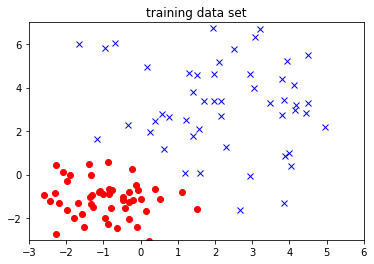

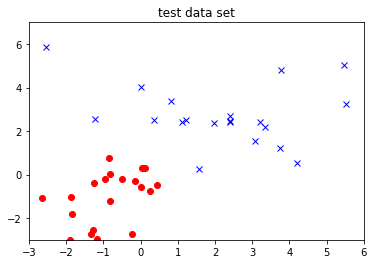

In [202]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [203]:
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

In [204]:
Y

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [205]:
classes

array([[0.48887111, 0.51112889],
       [0.49104262, 0.50895738],
       [0.5011314 , 0.4988686 ],
       [0.49855499, 0.50144501],
       [0.49803771, 0.50196229],
       [0.49767794, 0.50232206],
       [0.48817556, 0.51182444],
       [0.48743831, 0.51256169],
       [0.50199829, 0.49800171],
       [0.49914595, 0.50085405],
       [0.49312052, 0.50687948],
       [0.50111027, 0.49888973],
       [0.49707033, 0.50292967],
       [0.49850145, 0.50149855],
       [0.49397889, 0.50602111],
       [0.49430322, 0.50569678],
       [0.486632  , 0.513368  ],
       [0.4891299 , 0.5108701 ],
       [0.49708632, 0.50291368],
       [0.49862337, 0.50137663],
       [0.51058918, 0.48941082],
       [0.50814966, 0.49185034],
       [0.51179178, 0.48820822],
       [0.51441381, 0.48558619],
       [0.50830122, 0.49169878],
       [0.50859264, 0.49140736],
       [0.52156857, 0.47843143],
       [0.50998161, 0.49001839],
       [0.5120186 , 0.4879814 ],
       [0.51128211, 0.48871789],
       [0.

Accuracy:  50.0 %


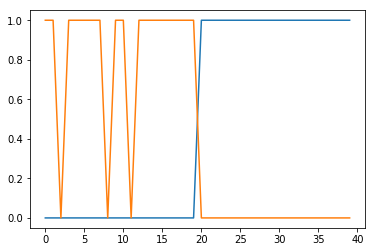

In [206]:
plt.plot(Ttest)
plt.plot(Y)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

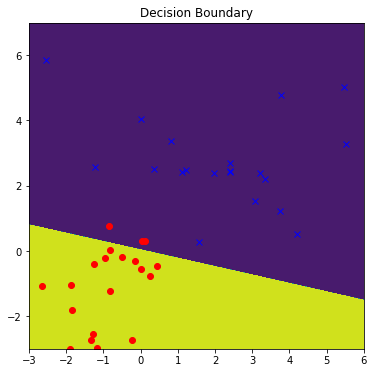

In [207]:
x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = _.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

### Discussion on Toy data-

We obtain 50% accuracy on the toy data.

# Testing on Classification Data-

In [295]:
XTrain, XTest, YTrain, YTest = model_selection.train_test_split(bank, bank1,test_size=0.20,random_state=42)

In [296]:
T.shape

(24000, 2)

In [297]:
nn = NeuralNetLogReg([24,4,2])
nn.train(sc.fit_transform(XTrain), T, niter=1000) 
p,l = nn.use(sc.fit_transform(XTest))

# Results-

In [298]:
y_test=np.where(YTest==0,0,1)
print('F1 score:', f1_score(y_test, l))
print('Accuracy:', accuracy_score(y_test, l))

F1 score: 0.35908655818405577
Accuracy: 0.21883333333333332


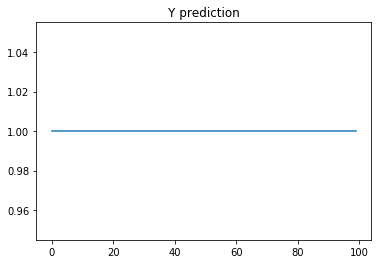

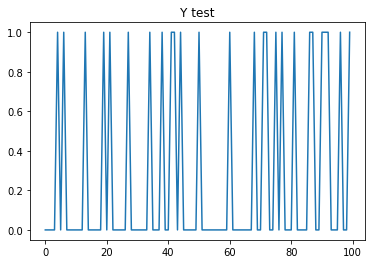

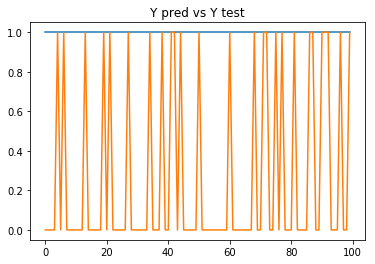

In [213]:
plt.title("Y prediction")
plt.plot(l[0:100])
plt.show()
plt.title("Y test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Y pred vs Y test")
plt.plot(l[0:100])
plt.plot(y_test[0:100])
plt.show()

In [214]:
cf3=confusion_matrix(y_test, l)
cf3
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]

In [215]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)

In [216]:
print('Precision: ' ,precision)

Precision:  0.21883333333333332


Text(0.5,1,'Confusion Matrix')

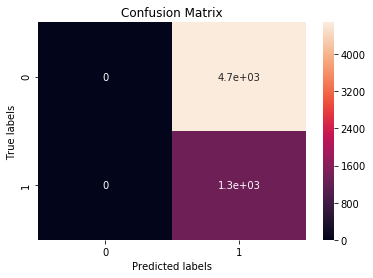

In [217]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

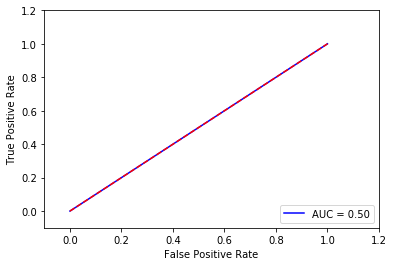

In [218]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, l)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Cross validation on non-linear logistic regression-

In [219]:
def split(s):
    avg = len(s) / 5.0
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + avg)])
        last += avg
    return out

final_list=[]
best_paramlist=[]
def cross_validate(X, T, parameters):
    partitionedX = split(X)
    partitionedT = split(T)
    for test in range(5): 
        print("test",test)
        Xtest = partitionedX[test]
        Ttest = partitionedT[test]
        j = 0
        
        history_rmse=[]
        params=[]
        for val in range(5): 
            print("val",val)
            if test == val: continue
            
            Xval = partitionedX[val]
            Tval = partitionedT[val]
            
            Xtrain = partitionedX[not test and not val]
            Ttrain = partitionedT[not test and not val]
            
            i = 0
            flist=[]
            paramlist=[]
            for param in parameters:
                
                model = NeuralNetLogReg(param)
                model.train(Xtrain, Ttrain)
                prob,pred = model.use(Xval)
                Tval1=Tval[:,0]
                Tval1=np.where(Tval1==0,1,0)
                valAcc = f1_score(Tval1, pred)
                flist.append(valAcc)
                paramlist.append(param)
            print(flist)
            print(paramlist)
            #avg=sum(rmselist)/len(rmselist)
            #history_rmse.append(avg)
            print(max(flist))
            print(paramlist[np.argmax(flist)])
            history_rmse.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        print("history_rmse",history_rmse)
        print("params",params)
        #print(rmselist)
        print(history_rmse)
        print(params)
        bestParam = params[np.argmax(history_rmse)]
        print(bestParam)
        bestModel = NeuralNetLogReg(bestParam)
        
        Xtrain = partitionedX[not test]
        Ttrain = partitionedT[not test]
        bestModel.train(Xtrain, Ttrain)

        prob1,finalPred = bestModel.use(Xtest)
        Ttest1=Ttest[:,0]
        Ttest1=np.where(Ttest1==0,1,0)
        myf1 = f1_score(Ttest1, finalPred)
        final_list.append(myf1)
        best_paramlist.append(bestParam)

    return final_list,best_paramlist

#### Explanation-
Same as above.

In [225]:
bank.shape

(30000, 24)

In [223]:
bank1.shape

(30000, 1)

In [229]:
models = [[24,5,2], [24,7,2],[24,9,2], [24,12,2]]
bestAccuracy,bestParam = (cross_validate(np.array(bank),np.array(bank1), models))

test 0
val 0
val 1
[0.8568417018014565, 0.6768882744753048, 0.6172542735042735, 0.7445039298325549]
[[24, 5, 2], [24, 7, 2], [24, 9, 2], [24, 12, 2]]
0.8568417018014565
[24, 5, 2]
val 2
[0.04777137982512263, 0.017429193899782133, 0.01872414543871108, 0.22525849335302803]
[[24, 5, 2], [24, 7, 2], [24, 9, 2], [24, 12, 2]]
0.22525849335302803
[24, 12, 2]
val 3
[0.0904443570585922, 0.5936271186440677, 0.6416565164433617, 0.8778561354019746]
[[24, 5, 2], [24, 7, 2], [24, 9, 2], [24, 12, 2]]
0.8778561354019746
[24, 12, 2]
val 4
[0.8415032679738562, 0.8811788845364671, 0.681224838355496, 0.5683262711864406]
[[24, 5, 2], [24, 7, 2], [24, 9, 2], [24, 12, 2]]
0.8811788845364671
[24, 7, 2]
history_rmse [0.8568417018014565, 0.22525849335302803, 0.8778561354019746, 0.8811788845364671]
params [[24, 5, 2], [24, 12, 2], [24, 12, 2], [24, 7, 2]]
[0.8568417018014565, 0.22525849335302803, 0.8778561354019746, 0.8811788845364671]
[[24, 5, 2], [24, 12, 2], [24, 12, 2], [24, 7, 2]]
[24, 7, 2]
test 1
val 0
[0

In [230]:
print(bestAccuracy)
print(bestParam)

[0.31756521739130433, 0.661973633687444, 0.06376689189189189, 0.4338343648688477, 0.7940329218106996]
[[24, 7, 2], [24, 7, 2], [24, 5, 2], [24, 5, 2], [24, 9, 2]]


In [309]:
nn = NeuralNetLogReg([24,7,2])
nn.train(sc.fit_transform(XTrain), T,optim='scg') 
p,l = nn.use(sc.fit_transform(XTest))

In [311]:
y_pred1=l
y_test1=np.where(YTest==0,0,1)
print('F1 score:', f1_score(y_test1, y_pred1))
print('Accuracy:', accuracy_score(y_test1, y_pred1))

F1 score: 0.35908655818405577
Accuracy: 0.21883333333333332


# Analysis about parameter/network structure choice-

We have used a 5 layered neural network.Input layer has 24 nodes because our data has 24 features.The output layer has 2 nodes.
The optimum value for my data was 7 so we are using 7 hidden layers.The structures with hidden layer values as 5,7,9,12 were used out of which 12 gave us the best accuracy.The output has 2 nodes.As the value 7 has occurred the most we have selected that as our value for the hidden layer nodes.We obtained an f1 score of:0.35908655818405577 and an accuracy of:0.21883333333333332.

# Discussion about the prediction results

In this assignment we have performed nonlinear logistic regression analysis using Neural networks which on a non-linear regression problem. On training the model using NeuralNetLogReg with optimum structure [24,7,2], model has produced F1 score: 0.35908655818405577  and Accuracy: 0.21883333333333332

# Conclusion-
I have learnt the working of neural networks and how cross validation is used.I learnt how to implement k fold cross validation. I learnt that sometimes increasing number of layers may not improve the model's accuracy as it may cause overfitting.

# References:
1.Professor's notes
2.Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.(Dataset 1)
3.K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.(Dataset 2)

# Extra Credit-

In [241]:
def load_csv(path='onlinenews.csv'):
    csv_path='onlinenews.csv'
    return pd.read_csv(csv_path)
onlinenews=load_csv()

In [242]:
onlinenews=onlinenews.drop('url',axis=1)
onlinenews_target=pd.DataFrame(onlinenews.iloc[:,-1])
onlinenews=onlinenews.drop('shares',axis=1)

In [243]:
onlinenews=onlinenews[[
'kw_avg_avg',                       
'LDA_03',                           
'kw_max_avg',                       
'self_reference_avg_shares',        
'self_reference_min_shares',        
'self_reference_max_shares',        
'num_hrefs',                        
'kw_avg_max',                       
'kw_min_avg',                       
'num_imgs',                         
'global_subjectivity',              
'kw_avg_min',                       
'kw_max_min',                       
'abs_title_sentiment_polarity',     
'num_videos',                       
'title_subjectivity',               
'num_keywords',                     
'is_weekend',                       
'weekday_is_saturday',              
'title_sentiment_polarity']]

In [244]:
onlinenews.head()

,kw_avg_avg,LDA_03,kw_max_avg,self_reference_avg_shares,self_reference_min_shares,self_reference_max_shares,num_hrefs,kw_avg_max,kw_min_avg,num_imgs,global_subjectivity,kw_avg_min,kw_max_min,abs_title_sentiment_polarity,num_videos,title_subjectivity,num_keywords,is_weekend,weekday_is_saturday,title_sentiment_polarity
0,0.0,0.041263,0.0,496.000000,496.0,496.0,4,0.0,0.0,1,0.521617,0.0,0.0,0.187500,0,0.500000,5,0,0,-0.187500
1,0.0,0.050101,0.0,0.000000,0.0,0.0,3,0.0,0.0,1,0.341246,0.0,0.0,0.000000,0,0.000000,4,0,0,0.000000
2,0.0,0.033334,0.0,918.000000,918.0,918.0,3,0.0,0.0,1,0.702222,0.0,0.0,0.000000,0,0.000000,6,0,0,0.000000
3,0.0,0.028905,0.0,0.000000,0.0,0.0,9,0.0,0.0,1,0.429850,0.0,0.0,0.000000,0,0.000000,7,0,0,0.000000
4,0.0,0.028572,0.0,3151.157895,545.0,16000.0,19,0.0,0.0,20,0.513502,0.0,0.0,0.136364,0,0.454545,7,0,0,0.136364


In [245]:
onlinenews_target.shape

(39644, 1)

# Tanh-

In [246]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [247]:
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

In [249]:
models = [[20,3,1],[20,5,1],[20,7,1], [20,10,1], [20,12,1]]

bestAccuracy,bestParam = cross_validate(np.array(onlinenews), np.array(onlinenews_target), models)

Test number:  0
K is :  0
K is :  1
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[23308.326198482995, 28256.837868970608, 20026.886685321842, 23927.262087810952, 23178.424437824408]
20026.886685321842
[20, 7, 1]
K is :  2
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[27024.040652112453, 20151.51438021128, 19241.07176644671, 30085.245769183653, 20005.567770680533]
19241.07176644671
[20, 7, 1]
K is :  3
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[20376.495153511823, 15957.953073744864, 16061.942709314702, 15218.89855295646, 17646.133488532105]
15218.89855295646
[20, 10, 1]
K is :  4
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[24691.52073324687, 20651.083237742027, 15882.405871913441, 23558.362485372425, 21074.381353967598]
15882.405871913441
[20, 7, 1]
[[20, 7, 1], [20, 7, 1], [20, 10, 1], [20, 7, 1]]
[20026.886685321842, 19241.07176644671, 15218.89855295646, 15882.405871913441]
[20, 7, 1]
Test number:  1
K is : 

In [250]:
print(bestAccuracy,bestParam)

[15576.613543700465, 20610.888441076273, 18286.520701685615, 16017.012063521228, 20658.712455151268] [[20, 7, 1], [20, 3, 1], [20, 3, 1], [20, 3, 1], [20, 3, 1]]


In [251]:
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(onlinenews),np.array(onlinenews_target),test_size=0.30,random_state=40)

In [252]:
model=NeuralNet([20,3,1])  
model.train(X_train,y_train,niter=1000)

{'w': array([-3.62237356,  0.6083733 ,  1.58257244,  5.06316025, -3.16112044,
        -0.84182165, -0.09106975, -0.46670506, -0.31477126, -4.89022403,
         1.29956752,  1.33861364,  0.93582531, -0.83505936,  4.25835018,
        -0.05827892, -0.1165995 ,  0.8923557 ,  1.33804984,  1.96073337,
        -0.37518493,  0.93976576, -0.26099768, -0.15536741,  2.34950624,
         0.01907158, -0.54771865, -1.41823665,  0.42666429,  0.07879262,
         1.453316  ,  0.20460545, -0.34161341,  2.55882459, -0.68464878,
        -0.86605978,  0.28383645, -0.26855855,  1.19675797,  3.45403083,
         0.6976527 , -1.63353074,  0.3845076 , -0.51809689, -0.15497166,
        -0.49886704, -0.08328108,  0.12430821,  0.08638452,  0.42410461,
         0.15467461,  1.6489734 , -0.35406171, -0.50056551,  6.59727359,
        -0.22108431, -1.70658463,  1.69552869, -0.06914068, -1.74128883,
         0.62024687,  0.02272639, -0.20212921,  0.02140335,  0.26124583,
        -0.14428289,  0.27649413]),
 'f': 0.48

In [253]:
y_pred=model.use(X_test)

In [254]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 13454.036528468112
R squared value: 0.013464837614576286


# Sigmoid-

In [255]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))
    
    def dSigma(self, X):
        return ((np.exp(-x))/(1+(np.exp(-x)))^2)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.Sigma(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (np.exp(-Z[i])/(1+np.exp(-Z[i]))**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [256]:
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

In [258]:
models = [[20,3,1],[20,5,1],[20,7,1], [20,10,1], [20,12,1]]
bestAccuracy,bestParam = cross_validate(np.array(onlinenews), np.array(onlinenews_target), models)

Test number:  0
K is :  0
K is :  1
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[12270.16096812219, 12269.782003449827, 12275.434873639086, 12266.647396431716, 12269.501527889333]
12266.647396431716
[20, 10, 1]
K is :  2
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[15970.965768628563, 15965.778298882828, 15967.453862039514, 15964.394165074571, 15979.460737469231]
15964.394165074571
[20, 10, 1]
K is :  3
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[6417.884317208692, 6391.484581091989, 6453.05281780036, 6405.410655768992, 6400.653129309913]
6391.484581091989
[20, 5, 1]
K is :  4
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[8095.0000234750405, 8090.741548727972, 8104.027573851814, 8094.734494261733, 8098.14882527284]
8090.741548727972
[20, 5, 1]
[[20, 10, 1], [20, 10, 1], [20, 5, 1], [20, 5, 1]]
[12266.647396431716, 15964.394165074571, 6391.484581091989, 8090.741548727972]
[20, 7, 1]
Test number:  1
K is :  0
[[2

In [259]:
print(bestAccuracy,bestParam)

[12507.184181554756, 12264.127148573616, 15980.826668416263, 6394.6800538800335, 8101.611961596613] [[20, 7, 1], [20, 7, 1], [20, 7, 1], [20, 10, 1], [20, 10, 1]]


In [260]:
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(onlinenews),np.array(onlinenews_target),test_size=0.30,random_state=40)

In [261]:
model=NeuralNet([20,3,1])
model.train(X_train,y_train,niter=1000)

{'w': array([ 0.06826118,  0.03793499,  0.0247176 , -0.87315924, -0.30740321,
         0.84570286, -0.26781271, -0.09888567,  0.09925275,  0.19007074,
        -0.04796689, -0.22005058, -0.04747516, -0.03807481,  0.18043112,
        -0.33212916, -0.07627213,  0.50465651, -0.14904186, -0.08224495,
         0.10576546, -0.24315103,  0.01547116,  0.09295325, -0.07711134,
         0.01020277, -0.00203334,  0.01639939, -0.07790276, -0.20762136,
        -0.10092659, -0.03779628,  0.01934398, -0.09836469, -0.01619311,
         0.05983732, -0.47863011, -0.20328012,  0.42272864, -0.42730429,
        -0.19779158,  0.18276212, -0.08185056, -0.1210067 ,  0.0708846 ,
        -0.01574401, -0.07449214,  0.03773533,  0.11137284,  0.08833803,
         0.02460723, -0.03555812,  0.00903311,  0.01649065, -0.03325804,
        -0.01608956,  0.03895232,  0.03176116,  0.08879987, -0.00236025,
        -0.02160571, -0.0065968 , -0.03166166, -0.10761673, -0.30936887,
         0.06705229,  0.49734424]),
 'f': 0.48

In [262]:
y_pred=model.use(X_test)
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 13442.229280087102
R squared value: 0.01519564225768133


# ReLu-

In [263]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))
    
    def dSigma(self, X):
        return ((np.exp(-x))/(1+(np.exp(-x)))^2)
    
    def ReLU(self, x):
        return x * (x > 0)

    def dReLU(self, x):
        return 1. * (x > 0)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.ReLU(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1. * Z[i])
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [264]:
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

In [313]:
models = [[20,3,1],[20,5,1],[20,7,1], [20,10,1], [20,12,1]]
bestAccuracy,bestParam = cross_validate(np.array(onlinenews), np.array(onlinenews_target), models)

Test number:  0
K is :  0
K is :  1
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[21696.95296232636, 22749.435321233737, 27878.203304257586, 19446.63146900719, 25624.38953049815]
19446.63146900719
[20, 10, 1]
K is :  2
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[22481.267203568546, 24664.05252984966, 26701.58413092429, 26884.774310473313, 22756.641929975278]
22481.267203568546
[20, 3, 1]
K is :  3
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[20517.9187273668, 19010.255314886745, 26486.715447791546, 16494.94514914215, 15804.978761230253]
15804.978761230253
[20, 12, 1]
K is :  4
[[20, 3, 1], [20, 5, 1], [20, 7, 1], [20, 10, 1], [20, 12, 1]]
[22959.138341288577, 15379.71864680277, 24144.681679888683, 17750.147276799267, 24160.13234090564]
15379.71864680277
[20, 5, 1]
[[20, 10, 1], [20, 3, 1], [20, 12, 1], [20, 5, 1]]
[19446.63146900719, 22481.267203568546, 15804.978761230253, 15379.71864680277]
[20, 10, 1]
Test number:  1
K is :  0


In [314]:
print(bestAccuracy,bestParam)

[13863.532861027961, 20561.060770863798, 20286.705316302287, 20641.25354176906, 23385.849849939976, 17701.225906830947, 16262.949213927948, 25915.423537019356, 22280.5535624099, 28934.68513992664] [[20, 7, 1], [20, 3, 1], [20, 3, 1], [20, 3, 1], [20, 3, 1], [20, 10, 1], [20, 3, 1], [20, 3, 1], [20, 3, 1], [20, 3, 1]]


In [315]:
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(onlinenews),np.array(onlinenews_target),test_size=0.30,random_state=40)

In [316]:
model=NeuralNet([20,3,1])  
model.train(X_train,y_train,niter=1000)

{'w': array([-10.13718718,   9.4670681 ,   0.41604003,   4.45894249,
         -5.04999676,  -1.59109425,  -2.94886307,   3.33077232,
         -0.09490718,  -0.6867575 ,   1.01780898,   0.94528123,
         -5.97972788,  -0.1112046 ,  -0.79590823,  -2.05269769,
         -1.29226053,   0.26751684,  -1.97146246,   4.11595582,
         -0.03703399,   2.0745845 ,  -2.51556747,  -0.13192083,
          7.19434466,  -7.66626867,   0.07933038,   0.74142285,
         -0.74273804,   0.3394377 ,   2.90119048,  -3.34536564,
          0.02468174,   4.94951619,  -5.27432765,  -0.07953773,
          0.27397462,  -0.03849498,  -0.39832097,  -1.99586061,
          1.15703174,   0.1814741 ,  -0.30929331,  -0.01058109,
         -0.08430788,   3.30409738,  -4.16272518,   0.02036049,
          0.61530414,  -0.31566584,   0.03062724,  -0.6436746 ,
          0.69095745,  -0.07879918,   8.11572152,  -8.83538001,
         -0.04750878,   2.99066224,  -3.39523189,  -0.01740773,
          0.0261502 ,   0.28263839,

In [317]:
y_pred=model.use(X_test)
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 13442.926622884908
R squared value: 0.015093462176537953


# Observation-
RMSE values for -<br>
tanh :13454.036528468112<br>
sigmoid :13442.229280087102<br>
ReLu :13442.926622884908<>